In [16]:
#remove all objects
#rm(list=ls())
library(MASS)
library(psych)

#create trace function
trace = function(X) sum(diag(X))

g = function(xvec, meanvec, inverseCovMatrix, Sigma, p) {
  detSigma = det(Sigma)
  
  return (1 / sqrt(2*pi)^(p/2) / sqrt(detSigma) *
            exp( -1/2 * ( t(xvec-meanvec) %*% inverseCovMatrix %*% (xvec-meanvec) )[1,1] ))
}


In [4]:
###############################################################
#1.1 - TRUE
X = matrix(runif(3*2),3,2)
trace(cov(X))

mu = (apply(X, 2, sd))^2
#mu
sum(mu)

[1] 0.1208493

[1] 0.1208493

In [5]:
###############################################################
#1.2 -TRUE
#trace(X'X) is the sum of diagonal
X = matrix(runif(3*2),3,2)
#X

Xsvd = svd(X)
S = diag(Xsvd$d)
#S
trace(t(X) %*% X)
trace (t(S) %*% S) #True. should be the same as trace(t(X) %*% X)
sum(X^2)

U = Xsvd$u
t(U) %*% U #transpose times itself is identity matrix

[1] 2.138867

[1] 2.138867

[1] 2.138867

1.000000e+00,-1.024302e-16
-1.024302e-16,1.000000e+00


In [6]:
###############################################################
#1.3 TRUE

# see definition of cov(X), the first half is equal to the first half in
# 1.1, and the second halves of problems 1.1 and 1.3 are the same
# even though the 1/(n-1) is pulled out!
X = as.matrix(anscombe)
n = nrow(anscombe)
p = ncol(anscombe)
mu = apply(X,2,mean)
Xbar = matrix(1,n,1) %*% mu
tr(t(X-Xbar) %*% (X-Xbar))/(n-1)

mu = (apply(X, 2, sd))^2
sum(mu)

[1] 60.50077

[1] 60.50077

In [7]:
###############################################################
#1.4 - TRUE. trace(S'S) = Sum of diagonal
A = matrix(runif(4),2,2)
Asvd = svd(A)
trace(A)
trace(U %*% A %*% t(U)) #should be the same as trace(A) because U and t(U) cancel out because they're unitary matrix
V = Asvd$v
det(V) # det of rotation, determinant is +1, reflection is -1

trace(A)
trace(V %*% A %*% t(V))

Asvd = svd(A)
S_A = diag(Asvd$d)
S_A
A
trace(t(A) %*% A)
trace(t(S_A) %*% S_A)
sum(A^2) #True. trace(t(S_A) %*% S_A) is the same as sum(A^2)

[1] 0.1024818

[1] 0.1024818

[1] 1

[1] 0.1024818

[1] 0.1024818

0.750844,0.0000000
0.000000,0.4587981


0.02965308,0.46769846
0.74117293,0.07282874


[1] 0.7742625

[1] 0.7742625

[1] 0.7742625

In [8]:
###############################################################
#1.5 - TRUE
# We know from discussion that the first half of 1.5 is equal to the first
# half of 1.3, and the second halves of 1.3 and 1.5 are the same

mu = apply(X,2,mean)
Xbar = matrix(1,n,1) %*% mu
F = sqrt(sum((X-Xbar)^2))

(F^2)/(n-1)
sum(mu)

[1] 60.50077

[1] 66.00273

In [9]:
###############################################################
#problem 1.6 - TRUE
#scale gives you Z-score
X = matrix(runif(4),2,2)
n = nrow(X)
p = ncol(X)
Z = scale(X)
trace(t(Z) %*% Z)/(n-1)
p
#apply(X,2,sd) #same as scale for scale()
#apply(X,2,mean) #same as center of scale()

#apply(scale(X),2,mean) #should be zero
#apply(scale(X), 2,sd)  #should be 1

#cov(scale()) should be the same as cor()
cov(scale(X))
cor(X)

#trace (Z'Z)/(n-1) = p
X = iris[,1:4]
cor(X)
diag(cor(X)) #diagonal is always 1 for correlation matrix
trace(cor(X)) # TRUE. sum of diagonal entries

#cor(U)

R = matrix(runif(10),5,2)
cor(R)
trace(cor(R)) #just add up all the 1's in diagonal

[1] 2

[1] 2

1,-1
-1,1


1,-1
-1,1


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.0000000,-0.1175698,0.8717538,0.8179411
Sepal.Width,-0.1175698,1.0000000,-0.4284401,-0.3661259
Petal.Length,0.8717538,-0.4284401,1.0000000,0.9628654
Petal.Width,0.8179411,-0.3661259,0.9628654,1.0000000


Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
           1            1            1            1

[1] 4

1.000000,0.625276
0.625276,1.000000


[1] 2

In [10]:
###############################################################
#problem 1.7- TRUE. sum of mean is sum of mean of independent random variables
ex1 = rnorm(1000, 75, 12)
ex2 = rnorm(1000, 71, 10)
ex3 = rnorm(1000, 87, 5)
grade = (ex1 + ex2 + ex3) /3
mean(grade)
mean(c(75,71,87)) #sum of mean is the sum mean of independent random variables


[1] 77.80582

[1] 77.66667

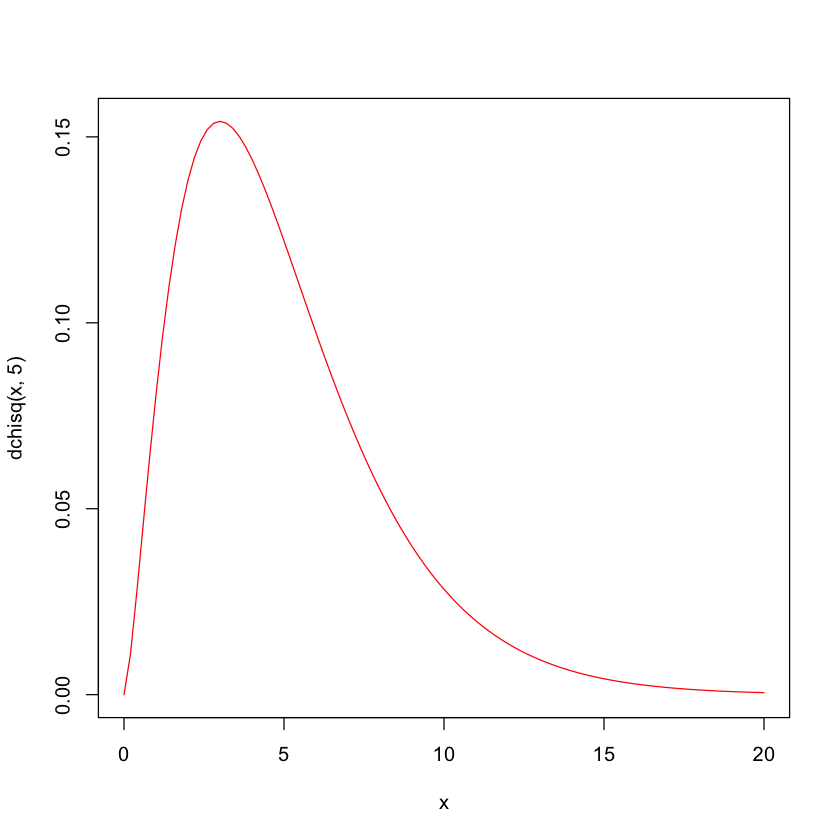

In [11]:
###############################################################
#problem 1.8 - FALSE. normal distributin doesn ot follow chi-squared distribution
curve(dchisq(x,5),0,20, col="red")

In [12]:
###############################################################
#problem 1.9 - False. Multiply Anscombe matrix by a const, cov() is not equal
X = as.matrix(anscombe)
cov(X)
cov(2*X)

,x1,x2,x3,x4,y1,y2,y3,y4
x1,11.000,11.000,11.000,-5.500,5.501000,5.500000,5.49700,-2.115000
x2,11.000,11.000,11.000,-5.500,5.501000,5.500000,5.49700,-2.115000
x3,11.000,11.000,11.000,-5.500,5.501000,5.500000,5.49700,-2.115000
x4,-5.500,-5.500,-5.500,11.000,-3.565000,-4.841000,-2.32100,5.499000
y1,5.501,5.501,5.501,-3.565,4.127269,3.095609,1.93343,-2.017731
y2,5.500,5.500,5.500,-4.841,3.095609,4.127629,2.42524,-1.972351
y3,5.497,5.497,5.497,-2.321,1.933430,2.425240,4.12262,-0.641000
y4,-2.115,-2.115,-2.115,5.499,-2.017731,-1.972351,-0.64100,4.123249


,x1,x2,x3,x4,y1,y2,y3,y4
x1,44.000,44.000,44.000,-22.000,22.004000,22.000000,21.98800,-8.460000
x2,44.000,44.000,44.000,-22.000,22.004000,22.000000,21.98800,-8.460000
x3,44.000,44.000,44.000,-22.000,22.004000,22.000000,21.98800,-8.460000
x4,-22.000,-22.000,-22.000,44.000,-14.260000,-19.364000,-9.28400,21.996000
y1,22.004,22.004,22.004,-14.260,16.509076,12.382436,7.73372,-8.070924
y2,22.000,22.000,22.000,-19.364,12.382436,16.510516,9.70096,-7.889404
y3,21.988,21.988,21.988,-9.284,7.733720,9.700960,16.49048,-2.564000
y4,-8.460,-8.460,-8.460,21.996,-8.070924,-7.889404,-2.56400,16.492996


In [13]:
###############################################################
#problem 1.10 - TRUE. correlation is caled so it should be the same
X = as.matrix(anscombe)
cor(X)
cor(2*X)

,x1,x2,x3,x4,y1,y2,y3,y4
x1,1.0000000,1.0000000,1.0000000,-0.5000000,0.8164205,0.8162365,0.8162867,-0.3140467
x2,1.0000000,1.0000000,1.0000000,-0.5000000,0.8164205,0.8162365,0.8162867,-0.3140467
x3,1.0000000,1.0000000,1.0000000,-0.5000000,0.8164205,0.8162365,0.8162867,-0.3140467
x4,-0.5000000,-0.5000000,-0.5000000,1.0000000,-0.5290927,-0.7184365,-0.3446610,0.8165214
y1,0.8164205,0.8164205,0.8164205,-0.5290927,1.0000000,0.7500054,0.4687167,-0.4891162
y2,0.8162365,0.8162365,0.8162365,-0.7184365,0.7500054,1.0000000,0.5879193,-0.4780949
y3,0.8162867,0.8162867,0.8162867,-0.3446610,0.4687167,0.5879193,1.0000000,-0.1554718
y4,-0.3140467,-0.3140467,-0.3140467,0.8165214,-0.4891162,-0.4780949,-0.1554718,1.0000000


,x1,x2,x3,x4,y1,y2,y3,y4
x1,1.0000000,1.0000000,1.0000000,-0.5000000,0.8164205,0.8162365,0.8162867,-0.3140467
x2,1.0000000,1.0000000,1.0000000,-0.5000000,0.8164205,0.8162365,0.8162867,-0.3140467
x3,1.0000000,1.0000000,1.0000000,-0.5000000,0.8164205,0.8162365,0.8162867,-0.3140467
x4,-0.5000000,-0.5000000,-0.5000000,1.0000000,-0.5290927,-0.7184365,-0.3446610,0.8165214
y1,0.8164205,0.8164205,0.8164205,-0.5290927,1.0000000,0.7500054,0.4687167,-0.4891162
y2,0.8162365,0.8162365,0.8162365,-0.7184365,0.7500054,1.0000000,0.5879193,-0.4780949
y3,0.8162867,0.8162867,0.8162867,-0.3446610,0.4687167,0.5879193,1.0000000,-0.1554718
y4,-0.3140467,-0.3140467,-0.3140467,0.8165214,-0.4891162,-0.4780949,-0.1554718,1.0000000


In [14]:
###############################################################
#problem 1.11 - FALSE - no std. dev if columns are constant
n=7
X = matrix(rep(1,n*2), n,2)
X
cor(X) #not possible

1,1
1,1
1,1
1,1
1,1
1,1
1,1


Warning message in cor(X):
“the standard deviation is zero”

1,NA
NA,1


In [15]:
###############################################################
#problem 1.12 - TRUE. pretty much the difitiion of correlation matrix.
cor(X)
cov(Z)


Warning message in cor(X):
“the standard deviation is zero”

1,NA
NA,1


1,-1
-1,1


In [17]:
###############################################################
#problem 2.1 - FALSE. log(Prob class_k[x] / Prob[class=l[x]) should be d_k - d_l

In [18]:
###############################################################
#problem 2.2 - TRUE.
# If you apply the dot product, and everything cancels out 


In [19]:
###############################################################
#problem 2.3 = TRUE

# You can see that the dk of problem 3.1 is the same 

In [20]:
###############################################################
#problem 2.4 - FALSE
X =matrix(runif(4*2),4,2)
covX = cov(X)
V = svd(cov(X))$v
S = diag(svd(cov(X))$d)
V
S
S^(1/2)
solve(S^(1/2))
S_to_the_minus_one_half = solve(S^(1/2))
Ztranspose = S_to_the_minus_one_half %*% t(V) %*% t(scale(X,center = TRUE, scale=FALSE))
Ztranspose %*% t(Ztranspose) #False. it shouldn't be the same because it's missing a 1/(n-1) factor


0.1451485,0.9894099
0.9894099,-0.1451485


0.1236124,0.00000000
0.0000000,0.09710212


0.3515855,0.0000000
0.0000000,0.3116121


2.844258,0.000000
0.000000,3.209118


3.000000e+00,-1.396206e-16
-1.396206e-16,3.000000e+00


In [21]:
###############################################################
#problem 2.5 - FALSE
#QDA model depends on the boundary of dataset.

In [22]:
###############################################################
#problem 2.6 - TRUE. whitening stuff. guess it's true everywhere.

In [23]:
##############################################################

#anscombe dataset
#attach(anscombe)
#x1
#y1

#cov(cbind(x1,y1))

#cov(cbind(x2,y2))

#cov(cbind(x1,y1)*2)

#cov(cbind(x1,y1)*3)

#cov(cbind(x2,y2)*2)

#cov(cbind(x2,y2)*7)

#SVD example
X = matrix(runif(4*2),4,2)
Xsvd = svd(X)
Xsvd_U = Xsvd$u
Xsvd_V = Xsvd$v
Xsvd_d = Xsvd$d


t(X) %*% X
Xsvd_V %*% (Xsvd_d %*% t(Xsvd_d)) %*% t(Xsvd_V)


apply(X, 2, var)
Xsvd_d %*% t(Xsvd_d)

0.2939854,0.2559554
0.2559554,0.2650716


0.4052262,0.2496723
0.2496723,0.1538308


[1] 0.03036821 0.02341858

0.5358919,0.1114181
0.1114181,0.0231651


In [24]:
#2nd discussion starts here###############################################################
#problem 3.1 - TRUE
#True. same covariance matrix = same Principle components

In [25]:
###############################################################
#problem 3.2 - FALSE
anscombe
attach(anscombe)
D1 = cbind(x1,y1)
D2 = cbind(x2,y2)
cov(D1)
cov(D2)
cov((D1+D2)/2) #False. not the same as cov(D1) or cov(D2)

x1,x2,x3,x4,y1,y2,y3,y4
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,8,7.24,6.13,6.08,5.25
4,4,4,19,4.26,3.10,5.39,12.50
12,12,12,8,10.84,9.13,8.15,5.56
7,7,7,8,4.82,7.26,6.42,7.91


,x1,y1
x1,11.000,5.501000
y1,5.501,4.127269


,x2,y2
x2,11.0,5.500000
y2,5.5,4.127629


,x1,y1
x1,11.0000,5.500500
y1,5.5005,3.611529


In [26]:
###############################################################
#problem 3.3 - TRUE
svd(cov(D1)) 
svd(cov(2*D1)) #True. eigenvalue changes, but eigenvector doesn't change

-0.8745867,-0.4848691
-0.4848691,0.8745867
-0.8745867,-0.4848691
-0.4848691,0.8745867


-0.8745867,-0.4848691
-0.4848691,0.8745867
-0.8745867,-0.4848691
-0.4848691,0.8745867


In [27]:
###############################################################
#problem 3.4 - FALSE
svd(cor(D1)) #False. eigenvectors u and v look weird

-0.7071068,-0.7071068
-0.7071068,0.7071068
-0.7071068,-0.7071068
-0.7071068,0.7071068


In [28]:
###############################################################
#problem 3.5 - TRUE
#not on midterm

In [29]:
###############################################################
#problem 3.6 - TRUE
#look at Rank k-th approximation Pg 58-59 on Linear Algebra Review notebook.

In [30]:
###############################################################
#problem 3.7 - TRUE
#True. already went over Frobenius Norm in Question 1.

In [31]:
###############################################################
#problem 3.8 - TRUE
X = matrix(runif(4*2),4,2)
Xsvd = svd(X)
X = matrix (runif(4*3),4,3)
Xsvd= svd(X)
X
S = diag(Xsvd$d)
S
cheapXsvd = svd(X, nu=2,nv=2)
cheapXsvd

X_2 = cheapXsvd$u %*% diag(cheapXsvd$d[1:2]) %*% t(cheapXsvd$v)
X
X_2

#cheapXsvd$d[1:3]^2

norm(X_2, type="F")
sqrt(sum(cheapXsvd$d[1:2]^2)) #[1:2] to ignore last column?
#True, approximation works

sqrt(sum(cheapXsvd$d[1:3]^2)) #to take all 3
norm(X, type="F")

0.83684307,0.7473068,0.2619496
0.17854194,0.7274779,0.8225568
0.06664068,0.4633466,0.5785336
0.82431304,0.9034061,0.5291383


2.084707,0.0000000,0.00000000
0.000000,0.7404283,0.00000000
0.000000,0.0000000,0.01755239


-0.5178901,0.5429814
-0.4858386,-0.6216061
-0.3111350,-0.4927428
-0.6316214,0.2756478
-0.5091954,0.72632395
-0.6980518,-0.03473633
-0.5034319,-0.68647426


0.83684307,0.7473068,0.2619496
0.17854194,0.7274779,0.8225568
0.06664068,0.4633466,0.5785336
0.82431304,0.9034061,0.5291383


0.84176287,0.7396858,0.2675406
0.18143505,0.7229963,0.8258447
0.06528454,0.4654473,0.5769925
0.81872179,0.9120672,0.5227842


[1] 2.212293

[1] 2.212293

[1] 2.212362

[1] 2.212362

In [32]:
###############################################################
#problem 3.9 - False
#eigenvalues cannot be negative, but can be 0.
X  = matrix(0,4,2)
X
svd(X)$d #False. if matrix is all zeros, eigven values can be 0.

0,0
0,0
0,0
0,0


[1] 0 0

In [33]:
###############################################################
#problem 3.10 - TRUE
X = matrix(runif(4*2),2,2)
U = eigen(X)$vectors
U
-U #True. if e is an eigvenvector of X, then -e is also an eigenvector of X

-0.5707421,-0.7355199
-0.8211294,0.6775031


0.5707421,0.7355199
0.8211294,-0.6775031


In [34]:
###############################################################
#problem 3.11 - TRUE
Xsvd = svd(X, nu = 4, nv=3)
U = Xsvd$u #unitary matrix needs to be square
t(U) %*% U #identity matrix

1.000000e+00,-3.309226e-17
-3.309226e-17,1.000000e+00


In [35]:
###############################################################
#problem 3.12 -  FALSE
#False. Pseudoinverse of U is U'. U is unitary matrix, and need to be squared.

In [36]:
###############################################################
#problem 3.13
#X = (t(X) %*% X)^-1 %*% t(X)
Xpseudoinv = solve( t(X) %*% X) %*% t(X)
X %*% Xpseudoinv #doesn't give correct inverse
Xpseudoinv %*% X #gives correct inverse. True. if X is invertible, then pseudoinverse X^-1 of X is also inverse of X.

ginv(X) #use library(MASS)

X = matrix(runif(3*3),3,3)
X
ginv(X) #pseudoinverse
solve(X) #regular inverse. If X is invertible, then regular inverse is the same as pseudoinverse

1.000000e+00,8.446976e-15
1.160994e-14,1.000000e+00


1.000000e+00,1.132753e-14
8.758838e-15,1.000000e+00


-4.774334,3.763762
4.987821,-2.826272


0.7112372,0.1813228,0.9336670
0.8043509,0.1488714,0.5453391
0.2342710,0.1608599,0.6973249


0.760776,1.123001,-1.896860
-20.481679,13.109445,17.171300
4.469155,-3.401386,-1.889785


0.760776,1.123001,-1.896860
-20.481679,13.109445,17.171300
4.469155,-3.401386,-1.889785


In [37]:
###############################################################
#problem 4.1 - TRUE
#All anscombe datasets have the same R^2 value. True.


In [38]:
###############################################################
#problem 4.2 - TRUE
y1hat = x1/2 + 3
epsilon1 = y1-y1hat
epsilon1
sum(epsilon1^2)

y2hat = x2/2 + 3
epsilon2 = y2-y2hat
sum(epsilon2^2)

y3hat = x3/2 + 3
epsilon3 = y3-y3hat

Rsquared = sum(y1hat^2)/sum(y1^2)
Rsquared

Rsquared = sum(y2hat^2)/sum(y2^2)
Rsquared

Rsquared = sum(y3hat^2)/sum(y3^2)
Rsquared
#True. All RSS value are the same for all 4 Anscombe datasets

[1]  0.04 -0.05 -1.92  1.31 -0.17 -0.04  1.24 -0.74  1.84 -1.68  0.18

[1] 13.7627

[1] 13.7763

[1] 0.9789105

[1] 0.9789052

[1] 0.979202

In [39]:
###############################################################
#Problem 4.3 - TRUE
#True. If X has a single column x, then the lease squares solution for y ~ B_0 + B_1 x is
# B_1 = cov(x,y) / cov(x,x)


In [40]:
###############################################################
#Problem 4.4 - TRUE
#True but not on midterm.

In [41]:
###############################################################
#problem 4.5 - FALSE
#False. Look at chart. First pricipal component of data is not identical to the 
#regression line that we will obtain if we omit the intercept.


In [42]:
###############################################################
#problem 4.6 - FALSE
#False. No idea why.

In [45]:
#pseduoInverse Implementation
n = 3
p = 2
X = matrix(runif(n*p),n,p)
X

# [,1] [,2]
# [1,] 0.9908163 0.55258366
# [2,] 0.5928249 0.06533842
# [3,] 0.5017761 0.70352193

#pseudo inverse function
pinv = function(X) { X_svd = svd(X)
                    U = X_svd$u
                    V = X_svd$v
                    sigma = X_svd$d
                    pseudo_invert = function (x) ifelse((x==0), 0, 1/x)
                        S_pinv = diag(pseudo_invert(sigma))
                        V %*% S_pinv %*% t(U) # return value X^- = V S^- U'
                        }
P = pinv(X)
P
# [,1] [,2] [,3]
# [1,] 0.7078091 1.057542 -0.6541685
# [2,] -0.1394906 -1.153377 1.6381010
                    
round( P %*% X, 3 ) # P should be a left inverse of X (when n > p)
# [,1] [,2]
# [1,] 1 0
# [2,] 0 1
                    


0.7916021,0.89533140
0.6070323,0.08736096
0.9226579,0.71937014


-0.5412469,1.630183,0.47566749
1.2563724,-1.685692,0.03112999


1,0
0,1


In [46]:
another_pinv = function(X) {X_svd = svd(X)
                            U = X_svd$u
                            V = X_svd$v
                            sigma = X_svd$d
                            S = diag(sigma)
                            V %*% solve(t(S) %*% S) %*% t(S) %*% t(U) # return value X^- = V (S' S)^(-1) S' U'
                           }
P = another_pinv(X)
P
# [,1] [,2] [,3]
# [1,] 0.7078091 1.057542 -0.6541685
# [2,] -0.1394906 -1.153377 1.6381010
                    
round( P %*% X, 3 ) # P should be a left inverse of X (when n > p)
# [,1] [,2]
# [1,] 1 0
# [2,] 0 1
    


-0.5412469,1.630183,0.47566749
1.2563724,-1.685692,0.03112999


1,0
0,1


In [47]:
yet_another_pinv = function(X) {solve(t(X) %*% X) %*% t(X)} #return (X' X)^(-1) X'
P = yet_another_pinv(X)
P
# [,1] [,2] [,3]
# [1,] 0.7078091 1.057542 -0.6541685
# [2,] -0.1394906 -1.153377 1.6381010
round( P %*% X, 3 ) # P should be a left inverse of X (when n > p)
# [,1] [,2]
# [1,] 1 0
# [2,] 0 1

-0.5412469,1.630183,0.47566749
1.2563724,-1.685692,0.03112999


1,0
0,1
